In [2]:
from gradio_client import Client, handle_file
import shutil
from IPython.display import Image
import PIL.Image
import PIL.ImageEnhance
import PIL.ImageDraw
import PIL.ImageOps
import PIL.ImageFilter

client = Client("https://sana.hanlab.ai/")
def gen(id, prompt, seed, extra=', photographed in a dark room, watercolor masterpiece, Studio Ghibli style, simple shapes, flat shading', flip=False, transparent=False, **kwargs):
    prompt += extra
    cfg = dict(
            negative_prompt="",
            style="Fantasy art",
            use_negative_prompt=False,
            num_imgs=1,
            seed=seed,
            height=256,
            width=256,
            flow_dpms_guidance_scale=4.5,
            flow_dpms_pag_guidance_scale=1,
            flow_dpms_inference_steps=20,
            randomize_seed=False,
            api_name="/run",
    )
    cfg.update(kwargs)
    result = client.predict(
            prompt=prompt,
            **cfg,
    )
    path = result[0][0]['image']
    destination = f"public/images/generated/{id}.webp"
    if flip:
        img = PIL.Image.open(path)
        img = img.transpose(PIL.Image.FLIP_LEFT_RIGHT)
        img.save(path, format='webp')
    if transparent:
        img = PIL.Image.open(path).convert('RGBA')
        PIL.ImageDraw.floodfill(img, (10, 10), (0, 0, 0, 0), thresh=20)
        img.save(path, format='webp')
    shutil.copy(path, destination)
    return Image(destination)
def creature(name, description, seed, **kwargs):
    return gen(
        name, description, seed, extra=', cute monster, black background, screenshot',
        height=512,
        width=512,
        flow_dpms_inference_steps=20, **kwargs)

Loaded as API: https://sana.hanlab.ai/ ✔


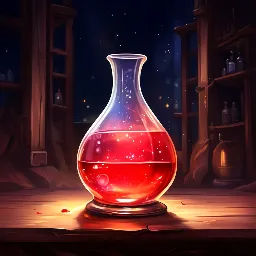

In [75]:
gen('Health Potion', 'A flask filled with a red liquid', 1)

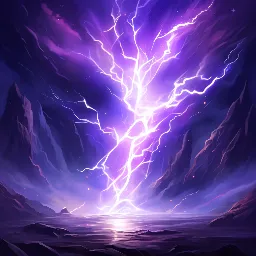

In [76]:
gen('Purple Spark', 'A purple lightning bolt', 1)

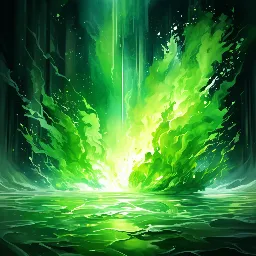

In [77]:
gen('Acid Bolt', 'a violent splash of green acid', 1)

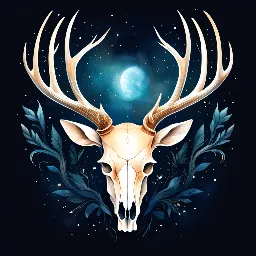

In [78]:
gen('Blessing of the Woods', 'a deer skull', 1)

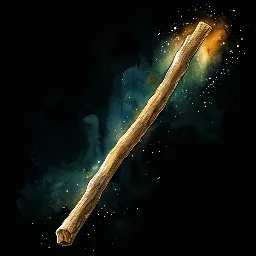

In [79]:
gen('Wooden Stick', 'a simple wooden stick', 1)

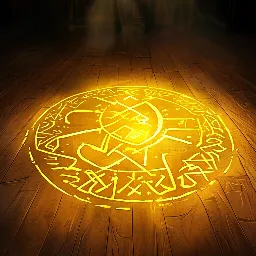

In [154]:
gen('Enscribe', 'nordic runes painted in yellow on the floor, close up', 8)

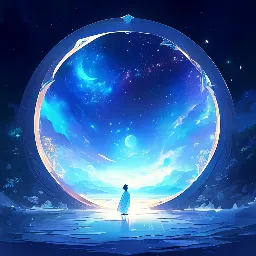

In [113]:
gen('Lunar Portal', 'a circular portal to a nightscape', 5)

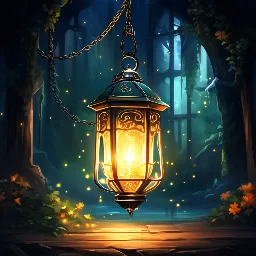

In [24]:
gen('Illuminate', 'a glowing lantern hanging from a chain', 1)

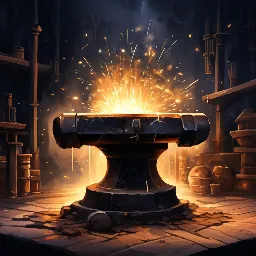

In [44]:
gen('Forge', "a blacksmith's anvil, sparks", 6)

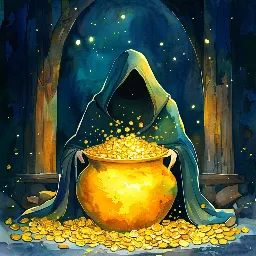

In [114]:
gen('Snatch', "a pot of gold in front of a hooded figure", 5)

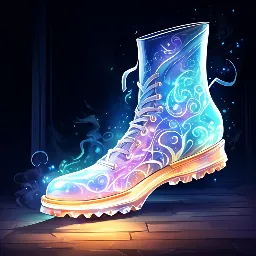

In [161]:
gen('Running Start', "an electrified shoe", 1)

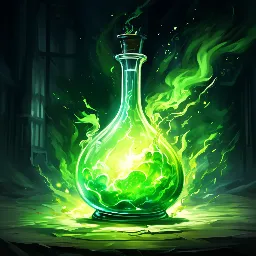

In [165]:
gen('Poison Strike', "an exploding flask of green poison", 1)

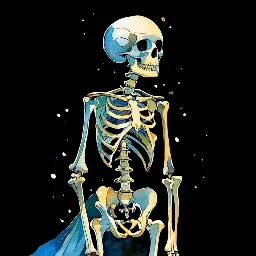

In [ ]:
gen('Animated Skeleton', 'a weak unarmored skeleton standing up, black background', 7)

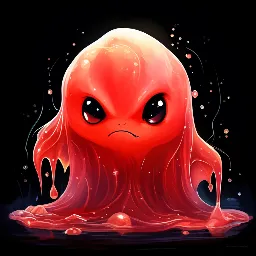

In [11]:
gen('Wild Slime', 'a translucent red slime creature with angry eyes, black background', 3)

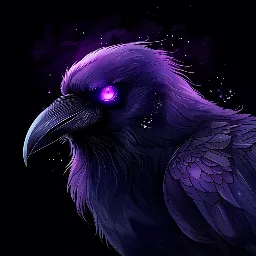

In [40]:
gen('Poison Crow', 'a crow with glowing purple eyes, black background', 3)

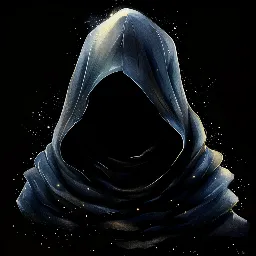

In [115]:
gen('The Shroud', 'a hooded figure, face concealed in darkness, black background', 1)

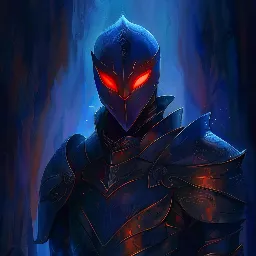

In [133]:
gen('Dark Lord', 'an armored man concealed in darkness, two glowing red eyes', 7)

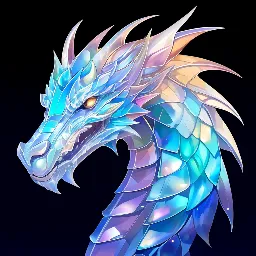

In [139]:
gen('Glass Dragon', 'the head of a dragon made of translucent glass, mirror scales', 2)

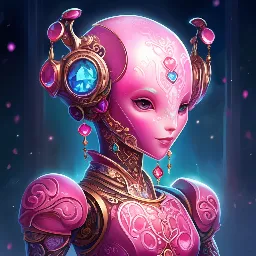

In [146]:
gen('Xaranthian Construct', 'a pink robot with an engraved heart on its head, jewel decorations', 5)

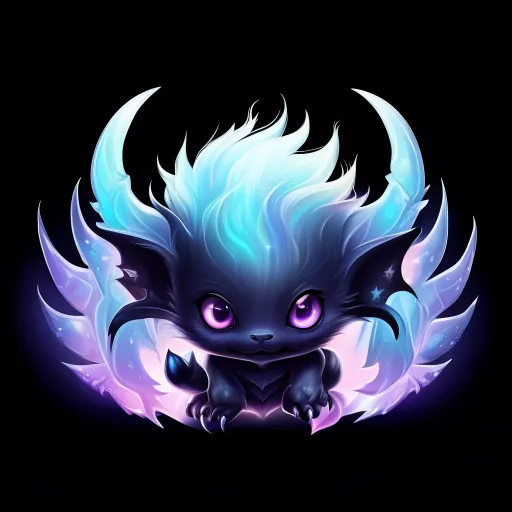

In [ ]:
creature('Knight of Claws', 'a cute monster with large sharp claws', 2)

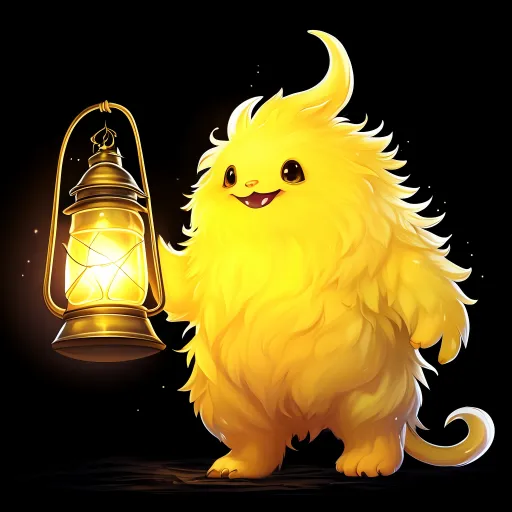

In [32]:
creature('Lamplighter', 'a cute yellow monster carrying a glowing lantern', 2)

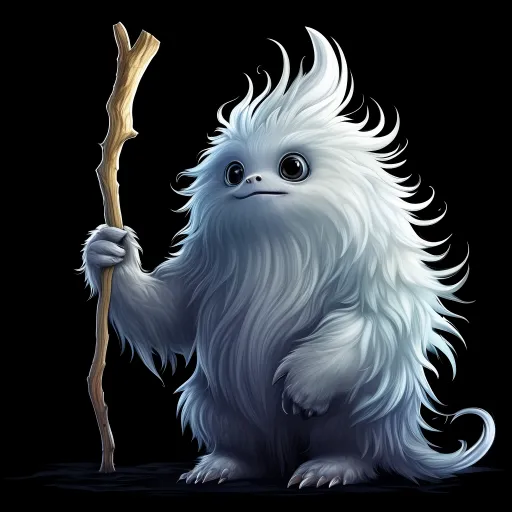

In [33]:
creature('Stick Master', 'a cute grey monster holding a stick', 2)

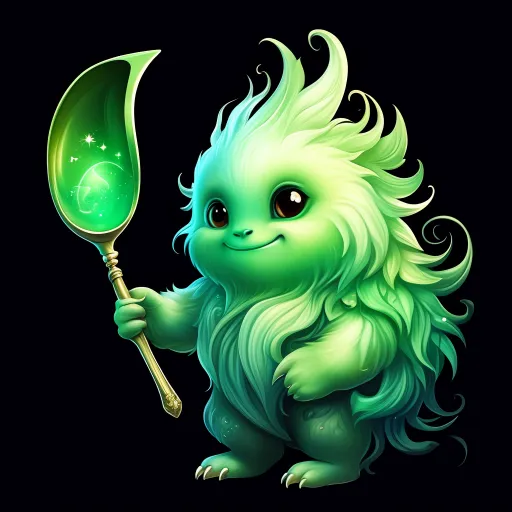

In [39]:
creature('Dark Chef', 'a cute monster holding a green ladle', 2)

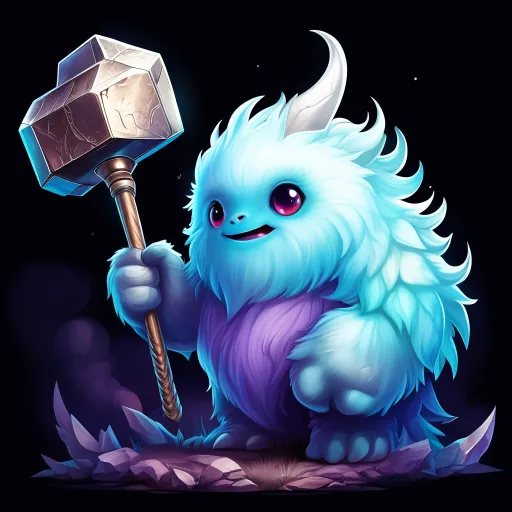

In [40]:
creature('Anvilomancer', 'a cute monster holding a huge hammer', 2)

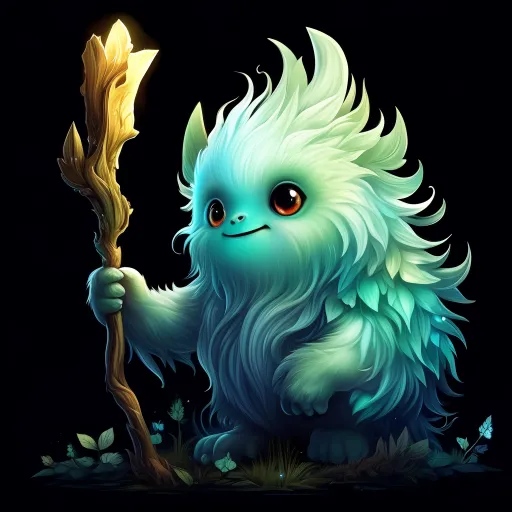

In [66]:
creature('Stick Grandmaster', 'a cute forest monster holding a stick', 2)

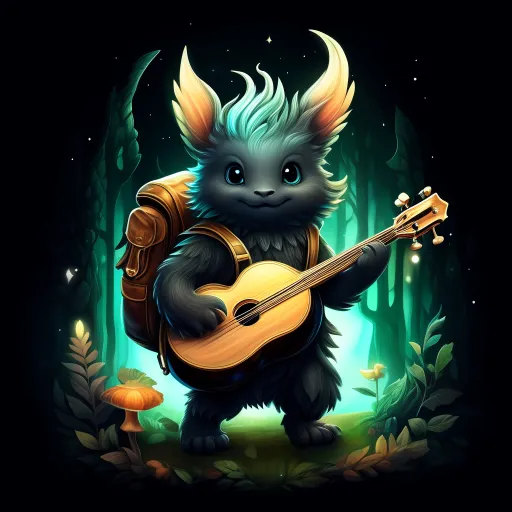

In [87]:
creature('Bard of Lortis', 'a cute forest monster walking with a lute and a backpack', 2)

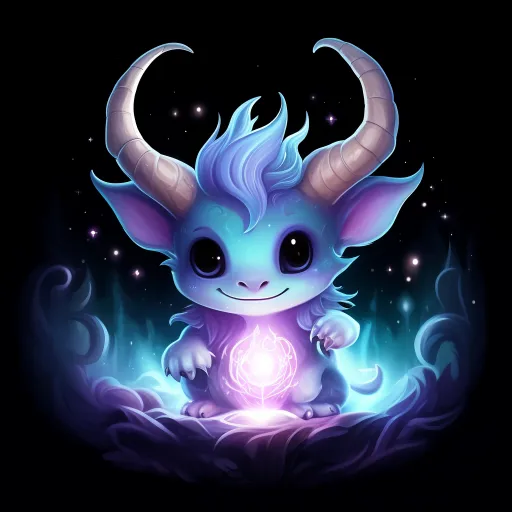

In [88]:
creature('Azrekta', 'a cute horned monster casting a spell', 2)

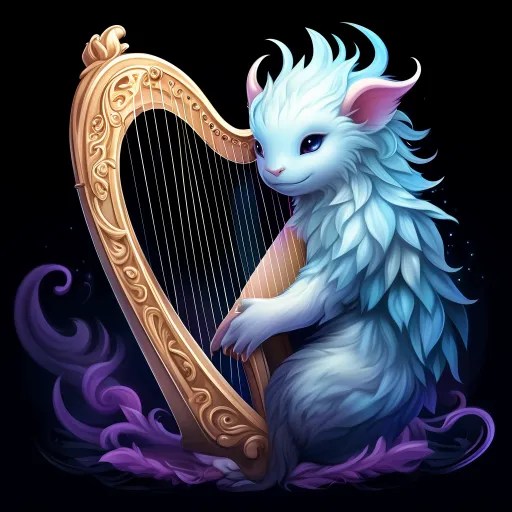

In [46]:
creature('The Silent Song', 'a cute monster holding a harp', 2)

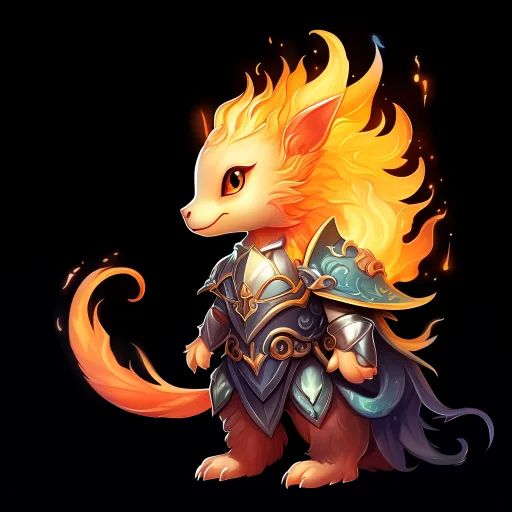

In [93]:
creature('Friend of Metal and Fire', 'a cute fire monster wearing armor, side view', 2)

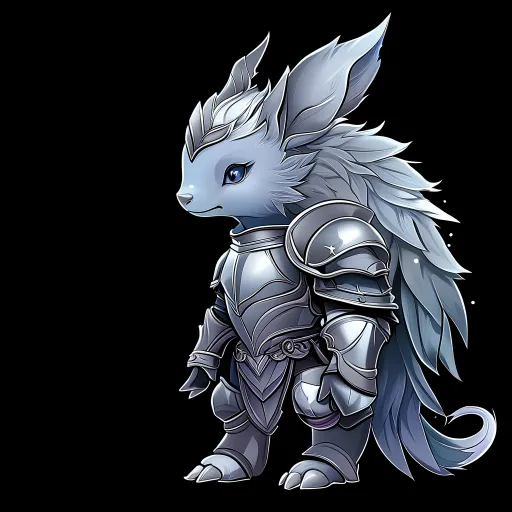

In [92]:
creature('Friend of Metal', 'a cute grey monster wearing armor, side view', 2)

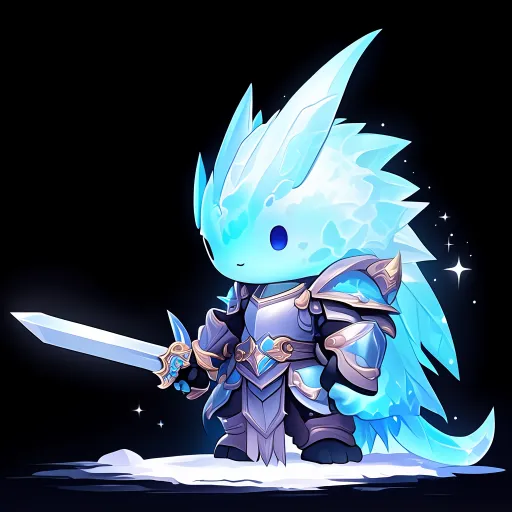

In [98]:
creature('Coldblade', 'a cute icicle monster wearing armor holding a sword, side view', 2)

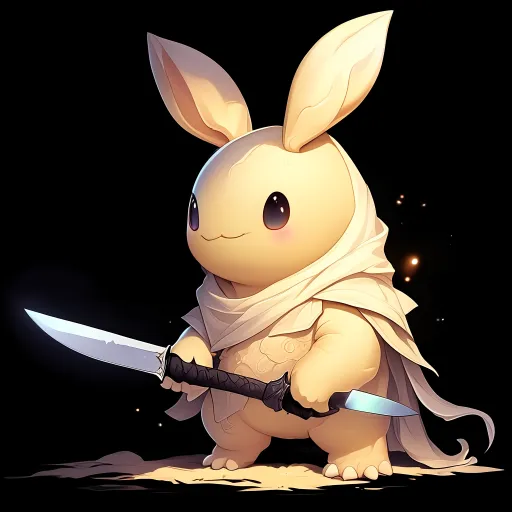

In [116]:
creature('Desert Rabbit', 'a cute sand monster with bunny ears, a knife in both hands, side view', 2)

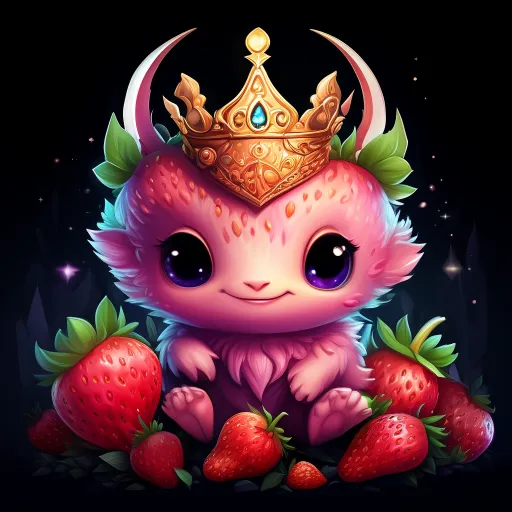

In [8]:
creature('Royal Fruitbearer', 'a small monster wearing a crown with a heap of strawberry', 2)

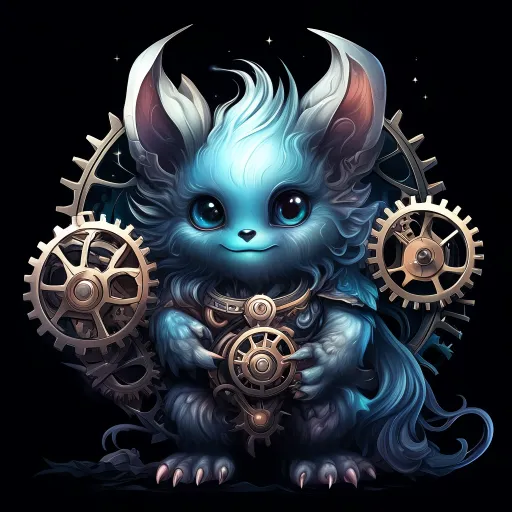

In [199]:
creature('Lord of Gears', 'a monster holding large gears', 2)

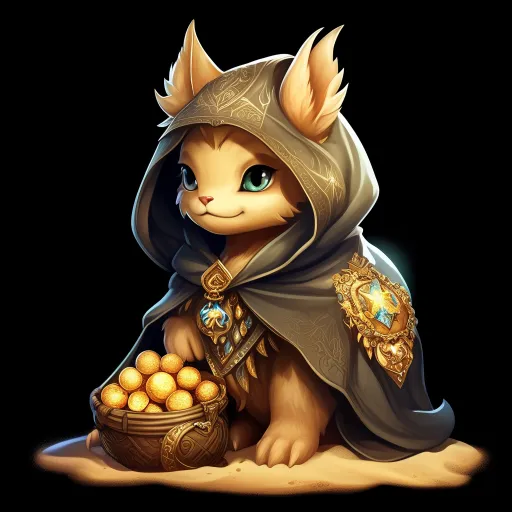

In [97]:
creature('Pur Lion', 'a furry sand monster with cat ears and a hood, a sack of treasure, side view', 6)

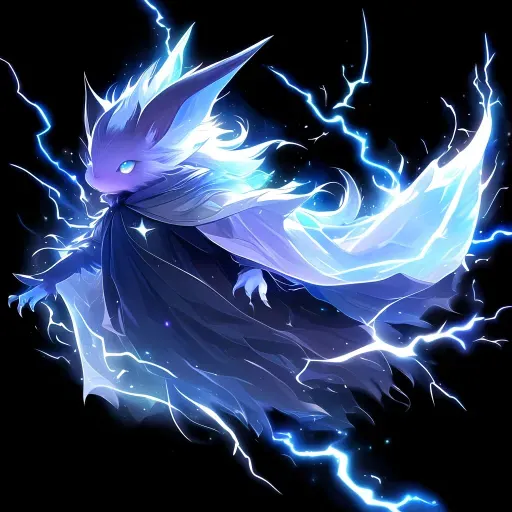

In [197]:
creature('Kit Flash', 'a large monster wearing a cloak flying, chased by lightning bolts', 7, flip=True)

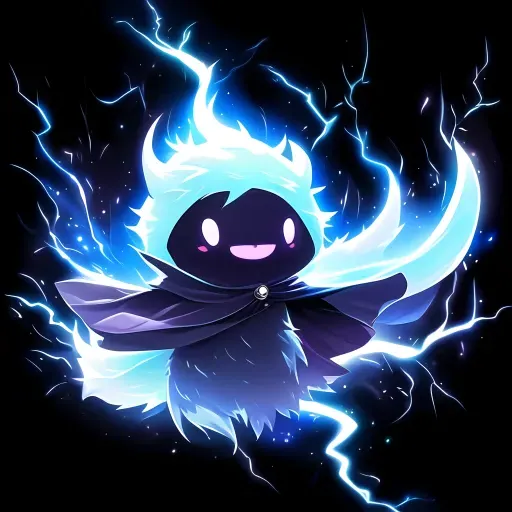

In [196]:
creature('Kit Flash', 'a cute monster wearing a cloak flying in lightning', 7, flip=True)

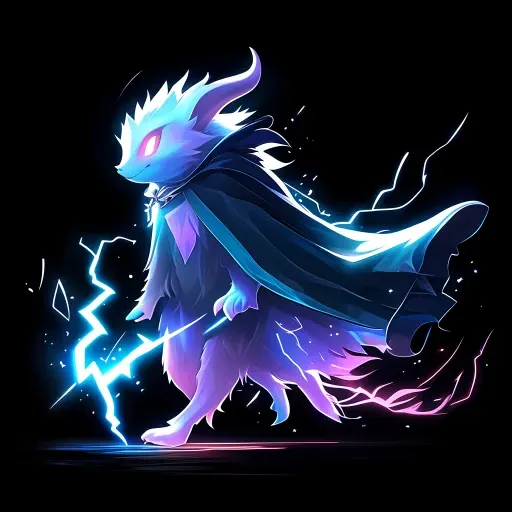

In [160]:
creature('Kit Flash', 'a cute monster wearing a cloak running left with a lightning bolt', 4, flip=True)

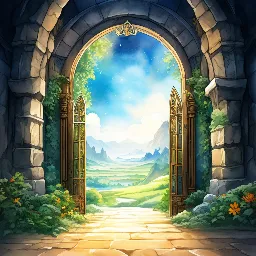

In [37]:
gen('Retreat', 'a thick dungeon door leading to a sunny landscape', 1)

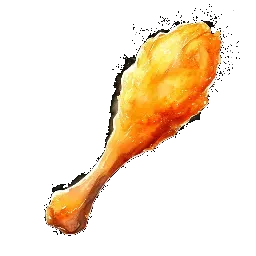

In [489]:
gen('food', 'a fried chicken drumstick, black background', 1, transparent=True)

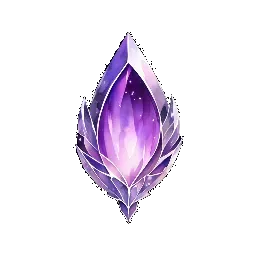

In [304]:
gen('gem', 'one purple gem cut for jewelry, black background', 5, transparent=True)

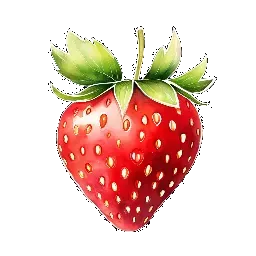

In [303]:
gen('fruit', 'a strawberry, black background', 1, transparent=True)

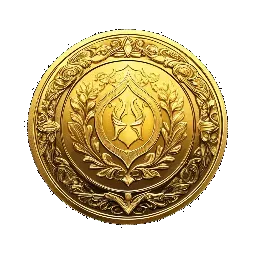

In [628]:
gen('gold', 'a gold coin with a crest engraved, black background', 2, transparent=True)

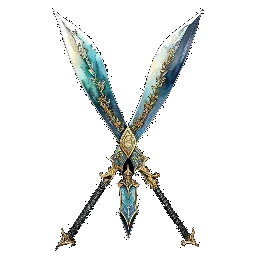

In [ ]:
gen('combat', "two scimitars crossed, black background", 5, transparent=True)

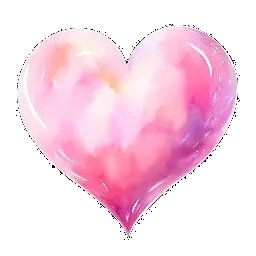

In [3]:
gen('rescue', "smooth pink heart, no background", 7, transparent=True)

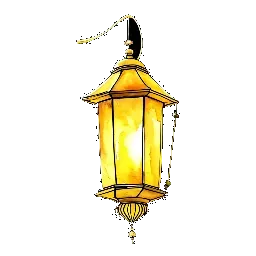

In [ ]:
gen('rescue', "a yellow lantern, black background", 5, transparent=True)

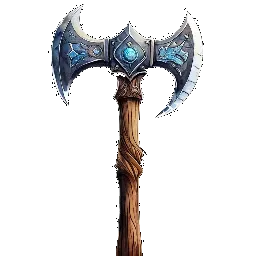

In [490]:
gen('combat', "a heavy wood axe, black background", 4, transparent=True)

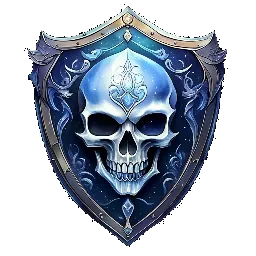

In [510]:
gen('combat', "shield in the shape of a skull, black background", 3, transparent=True)

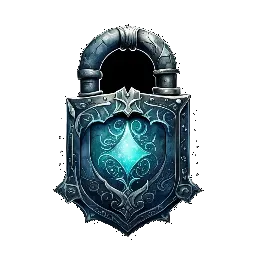

In [577]:
gen('rescue', "an orc padlock, black background", 6, transparent=True)

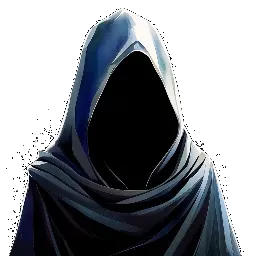

In [620]:
gen('rescue', "a hooded person, only the head is visible, black background", 6, transparent=True)

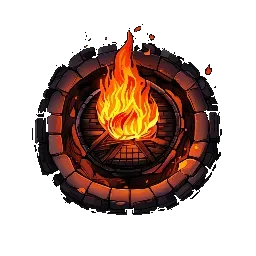

In [543]:
gen('campfire', "firepit, top view, black background", 6, extra='', style="(No style)", transparent=True)

In [4]:
def makeoutline(name):
    im = PIL.Image.open(f"public/images/generated/{name}.webp")
    alpha = im.getchannel("A")
    alpha = alpha.filter(PIL.ImageFilter.GaussianBlur(radius=9))
    alpha = alpha.point(lambda p: p**2)
    result = PIL.Image.new("RGBA", im.size, (0, 0, 0, 0))
    whiteness = PIL.Image.new("RGBA", im.size, (255, 255, 255, 255))
    result.paste(whiteness, mask=alpha)
    alpha = im.getchannel("A")
    alpha = alpha.filter(PIL.ImageFilter.GaussianBlur(radius=4))
    alpha = alpha.point(lambda p: p**2)
    blackness = PIL.Image.new("RGBA", im.size, (0, 0, 0, 255))
    result.paste(blackness, mask=alpha)
    result = PIL.Image.alpha_composite(result, im)
    result.save(f"public/images/generated/{name}-outlined.webp", format='webp')
for name in 'gold gem fruit food combat rescue campfire'.split():
    makeoutline(name)

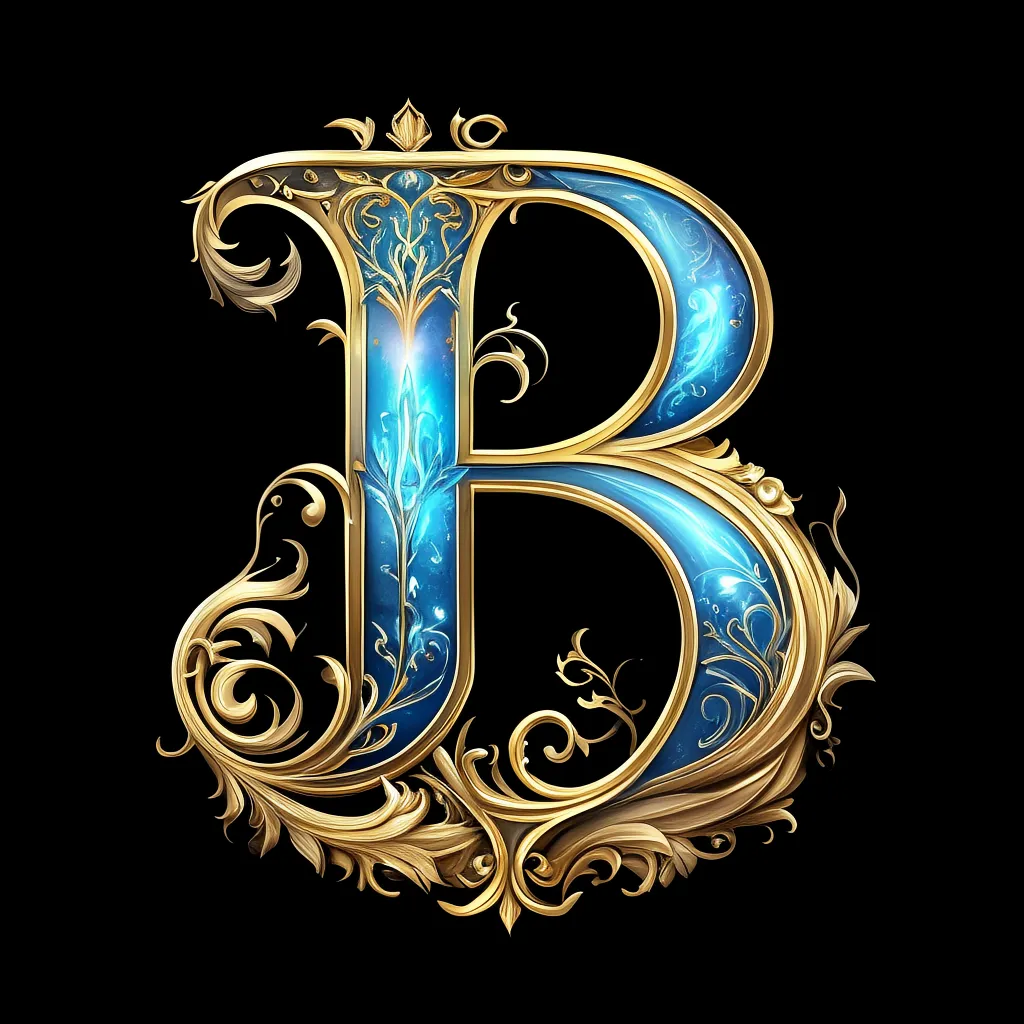

In [275]:
gen('logo', 'a logo resembling the letter B in gold and faint blue, wrought iron, vintage motifs, black background', 18, extra='', width=1024, height=1024, flow_dpms_inference_steps=20, flow_dpms_guidance_scale=7)

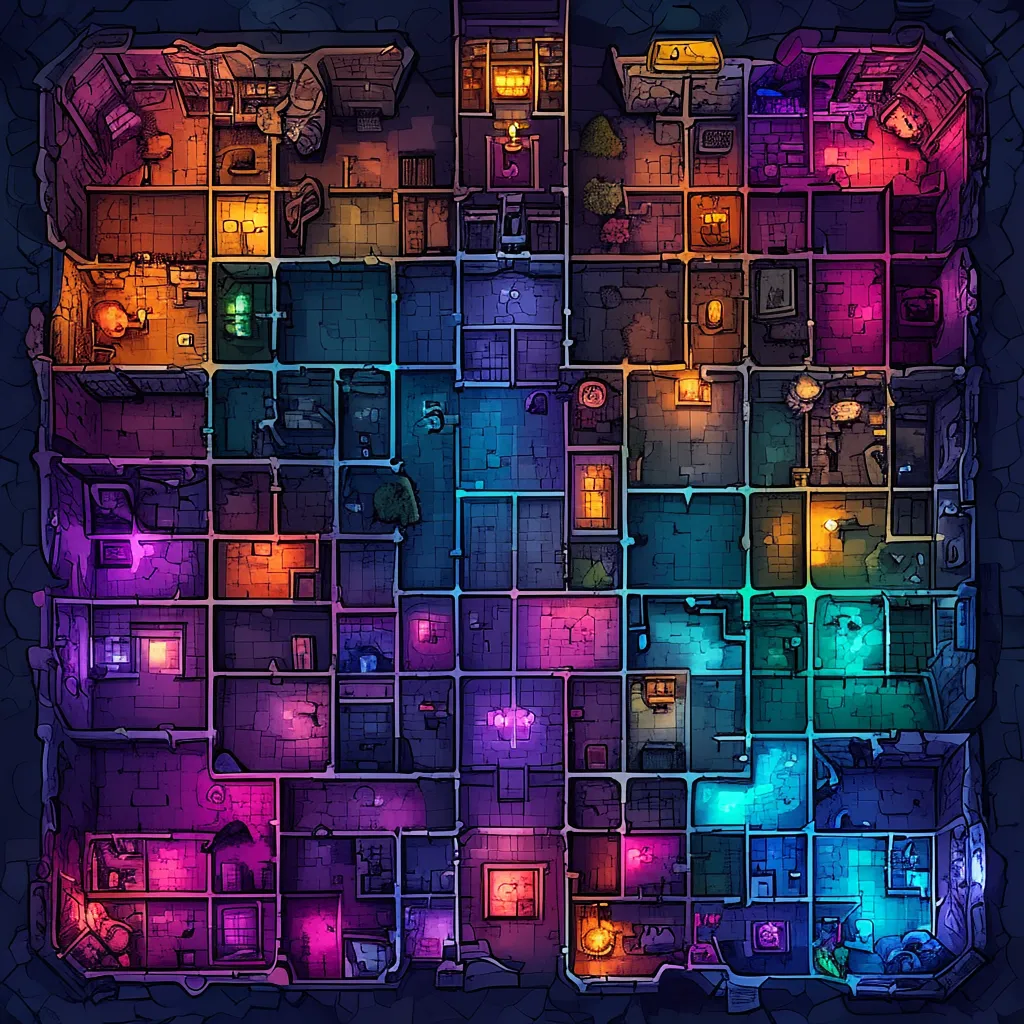

In [56]:
gen('map-preview', 'a dark, colorful grid-based fantasy dungeon map, overhead view of the many rooms of a dungeon, details', 2, extra='', width=1024, height=1024, flow_dpms_inference_steps=40, style="(No style)")

In [ ]:
import PIL.ImageEnhance
import PIL.ImageDraw
import PIL.ImageOps

img = PIL.Image.open('public/images/map-raw.png').convert('RGB')
img = PIL.ImageOps.invert(img)
img.save('public/images/generated/map-inverted.png')
style_client = Client("multimodalart/flux-style-shaping")
result = style_client.predict(
		prompt="A colorful fantasy dungeon map. Overhead view. Empty rooms.",
		structure_image=handle_file('public/images/generated/map-inverted.png'),
		style_image=handle_file('public/images/generated/map-preview.webp'),
		depth_strength=15,
		style_strength=0.5,
		api_name="/generate_image"
)
shutil.copy(result, "public/images/generated/map-styled.png")
img = PIL.Image.open("public/images/generated/map-styled.png")
img = PIL.ImageEnhance.Color(img).enhance(0.3)
img = PIL.ImageEnhance.Contrast(img).enhance(1.2)
# PIL.ImageDraw.floodfill(img, (10, 10), (0, 0, 0, 0), thresh=20)
img.save('public/images/generated/map.webp', format='webp')
img

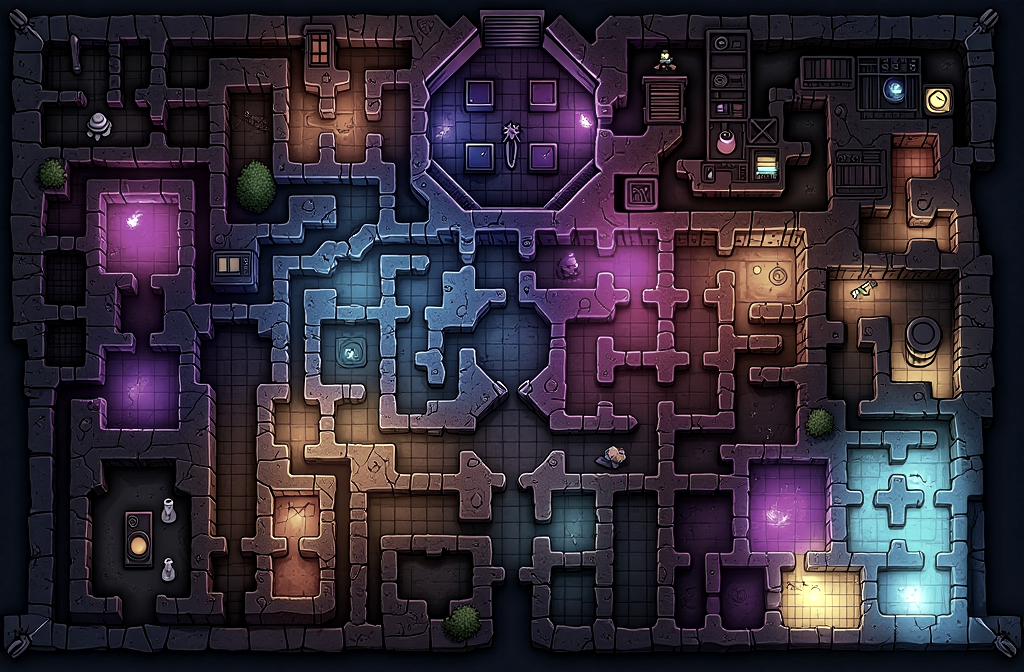

In [287]:
import PIL.ImageEnhance
import PIL.ImageDraw
img = PIL.Image.open("public/images/generated/map-styled.png")#.convert("RGBA")
img = PIL.ImageEnhance.Color(img).enhance(0.3)
img = PIL.ImageEnhance.Contrast(img).enhance(1.2)
# PIL.ImageDraw.floodfill(img, (10, 10), (0, 0, 0, 0), thresh=20)
img.save('public/images/generated/map.webp', format='webp')
img

